### Comparing regression methods on a simple synthetic data

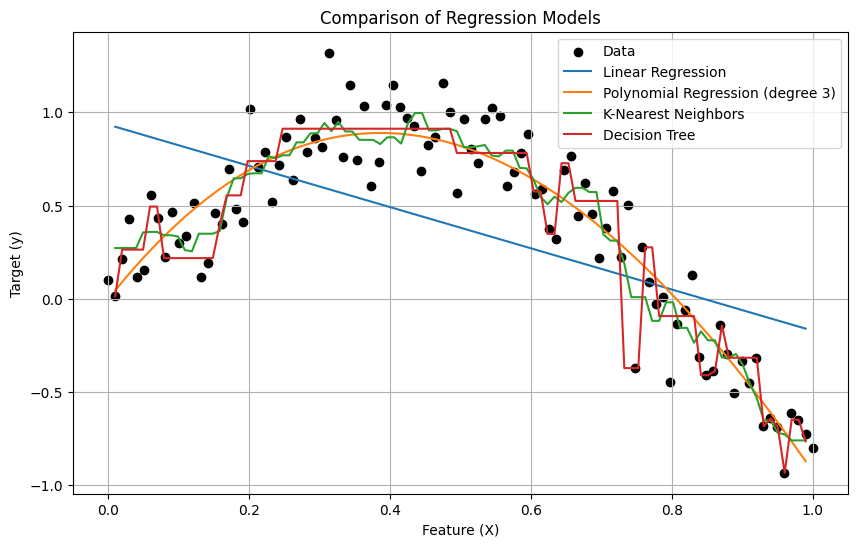

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0,1,100)[:,np.newaxis]
y = np.sin(4*X).ravel() + 0.2 * np.random.randn(X.shape[0])  # Non-linear relationship with noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree 3)": Pipeline([('fe',PolynomialFeatures(degree=3)), ('regressor',LinearRegression())]),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')

x_range = np.linspace(0.01, 0.99, 100).reshape(-1, 1)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=name)

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Regression Models')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
pl = PolynomialFeatures(degree=3)
pl.fit_transform([[2,3],[4,5]])

array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

### Regression for real world dataset

We use a data on diabetes progression based on various medical attributes. This dataset has 10 features (such as age, sex, BMI, blood pressure, etc.) and a target variable representing a quantitative measure of disease progression one year after baseline. The target, typically, is between -100 and 350. Higher values of the target generally indicate a higher level of disease progression over the one-year period.

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="progression")
print("Dataset Sample:")
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

pipeline_LR.fit(X_train, y_train)
yhat = pipeline_LR.predict(X_test)
print(f"test MSE of LR: {mean_squared_error(y_test, yhat):.2f}")

gs_lasso = GridSearchCV(pipeline_lasso,param_grid={"regressor__alpha": np.logspace(0,10,100)}, cv=5)
gs_lasso.fit(X_train, y_train)
yhat = gs_lasso.predict(X_test)
print(f"test MSE of Lasso: {mean_squared_error(y_test, yhat):.2f}")
print(f"best alpha of lasso: {gs_lasso.best_params_}")

gs_ridge = GridSearchCV(pipeline_ridge,param_grid={"regressor__alpha": np.logspace(0,10,100)}, cv=5)
gs_ridge.fit(X_train, y_train)
yhat = gs_ridge.predict(X_test)
print(f"test MSE of Ridge: {mean_squared_error(y_test, yhat):.2f}")
print(f"best alpha of Ridge: {gs_ridge.best_params_}")

Dataset Sample:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
test MSE of LR: 2900.19
test MSE of Lasso: 2800.95
best alpha of lasso: {'regressor__alpha': 1.5922827933410924}
test MSE of Ridge: 2857.88
best alpha of Ridge: {'regressor__alpha': 41.32012400115337}


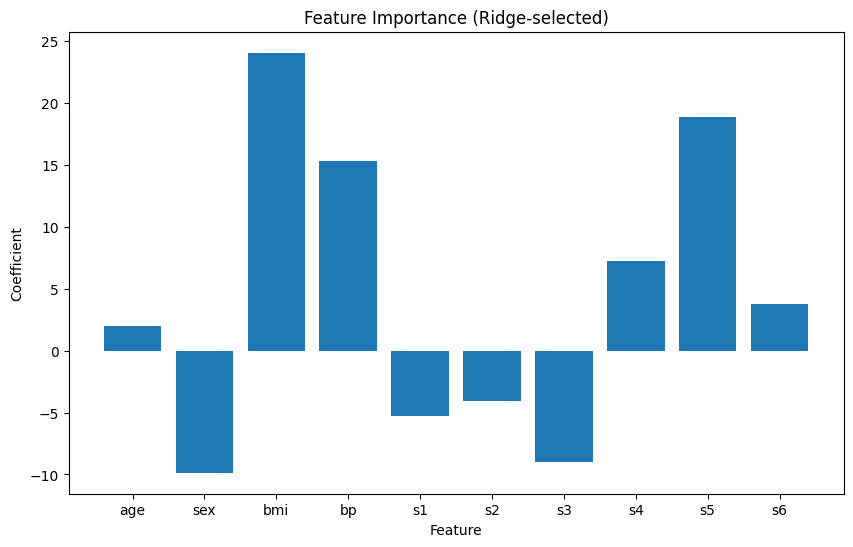

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(X.columns, gs_ridge.best_estimator_.named_steps["regressor"].coef_)
plt.title("Feature Importance (Ridge-selected)")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()

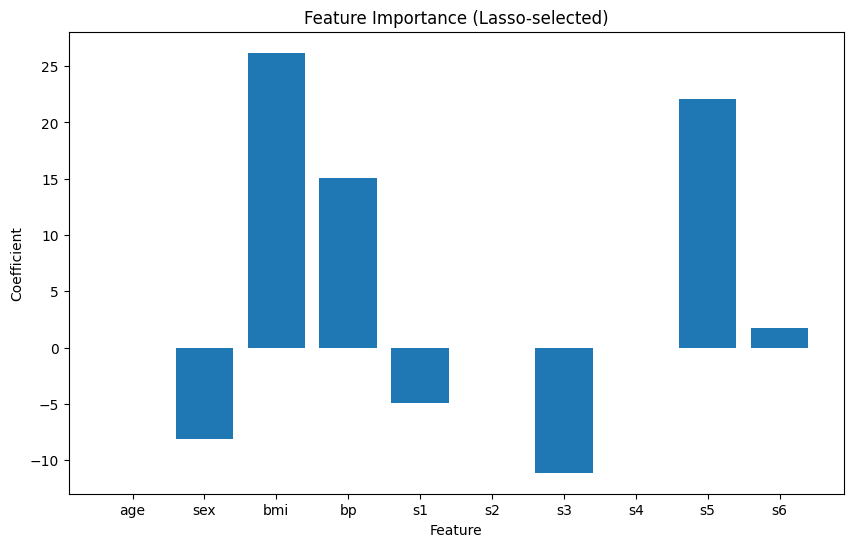

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(X.columns, gs_lasso.best_estimator_.named_steps["regressor"].coef_)
plt.title("Feature Importance (Lasso-selected)")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()